In [10]:
import matplotlib
import importlib
import ventos.test_trace as tt
import ventos.sim.simple as simple
import pandas as pd, matplotlib.pyplot as plt
from IPython.display import display, HTML
from pprint import pprint

matplotlib.rcParams['figure.figsize'] = [10,7]
pd.set_option('precision', 4)

{'IE': 0.5,
 'PEEP': 5,
 'Pi': 15,
 'cardiac_amplitude': 0.05,
 'end_time': 240,
 'events': [{'attr': 'PEEP', 'time': 40, 'val': 7},
            {'attr': 'PEEP', 'time': 43, 'val': 10},
            {'attr': 'Pi', 'time': 46, 'val': 15},
            {'attr': 'PEEP', 'time': 50, 'val': 14},
            {'attr': 'PEEP', 'time': 120, 'val': 5},
            {'attr': 'Pi', 'time': 120, 'val': 15}],
 'flow_noise_sd': 0.05,
 'heart_rate': 85,
 'pressure_noise_sd': 1,
 'rate': 10,
 'resistance': 20,
 'time_resolution': 50,
 'title': 'Creeping'}
Event at 40000ms setting PEEP to 7
Event at 43000ms setting PEEP to 10
Event at 46000ms setting Pi to 15
Event at 50000ms setting PEEP to 14
Event at 120000ms setting PEEP to 5
Event at 120050ms setting Pi to 15


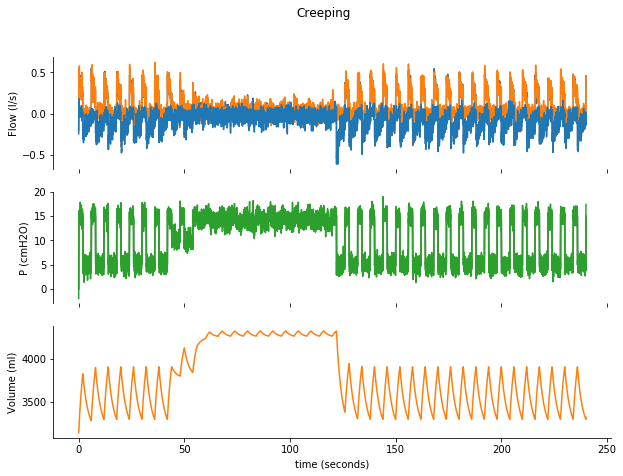

In [26]:
# importlib.reload(tt)
# importlib.reload(simple)
scenarios = tt.scenarios(tt.badnesses)
# A full list of scenarios:
# pprint(scenarios.keys())
scenario = scenarios['Creeping']
sim = tt.run_and_output(scenario)

In [28]:
### Testing PIRDS function:
def not_pirds(df):
    d = df[['time','pressure_1', 'pressure_1', 'flow_i', 'flow_e']].copy()
    d.columns = ['time', 'PI', 'PE', 'FI', 'FE']
    d['FI'] *= simple.litres_per_second_to_ml_per_minute
    d['FE'] *= simple.litres_per_second_to_ml_per_minute
    return d.astype(int)

json = simple.df_to_PIRDS(sim.head()).to_json(orient="records",lines=True)
csv = simple.df_to_PIRDS(sim.head()).to_csv(index=False)
not_pirds_csv = not_pirds(sim.head()).to_csv(index=False)

html = f"""<h1>PIRDS!!!</h1><h2>JSON</h2><pre>{json}</pre><h2>CSV</h2><pre>{csv}</pre>
       <h1>Not PIRDS!!!</h1><pre>{not_pirds_csv}</pre>"""

display(HTML(html))